**Airbnb DC Hosting Helper**

**6_neural_network_modeling**

**Summary**

This notebook will explore using Neural Network modeling on this binary classification problem to see how it compares with other types of classification models. This notebook was created in Google Colab which is why it is a separate notebook in the modeling phase. 

Import libraries and read in data

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/final_df.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 100 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                3652 non-null   int64  
 1   id                                        3652 non-null   int64  
 2   name                                      3652 non-null   object 
 3   description                               3609 non-null   object 
 4   neighborhood_overview                     2794 non-null   object 
 5   host_id                                   3652 non-null   int64  
 6   host_about                                2529 non-null   object 
 7   host_response_time                        3652 non-null   object 
 8   host_response_rate                        3652 non-null   float64
 9   host_acceptance_rate                      3652 non-null   float64
 10  host_is_superhost                  

Clean data before modeling.

In [8]:
df.drop(columns = ['Unnamed: 0', 'id', 'host_id',  'amenities', 'latitude_x', 'longitude_x',
                   'name', 'description', 'neighborhood_overview', 'host_about'
                  ], inplace=True)

In [9]:
cols = df.columns

new_cols = []

for i in cols:
    new_cols.append(i.replace(' ','_'))

In [10]:
df.columns = new_cols

In [11]:
normal = df.drop(columns=  ['host_response_time', 'neighbourhood_cleansed', 'room_type'])

ohe_cats = ['host_response_time', 'neighbourhood_cleansed', 'room_type']

categorical = df[ohe_cats]

In [12]:
enc = OneHotEncoder(drop = 'first', sparse=False)

categorical = enc.fit_transform(categorical) 

In [13]:
dummy_cat_names = enc.get_feature_names(ohe_cats)

categorical_df = pd.DataFrame(categorical, columns=dummy_cat_names)

In [14]:
df = pd.concat([normal, categorical_df], axis=1)

In [15]:
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,instant_bookable,calculated_host_listings_count,historic_site,museum,metro,music_venue,perfomring_arts_venue,college_and_university,food,nightlife_spot,outdoors_and_recreation,government_building,clothing_store,popular,days_being_host,days_since_first_review,days_since_last_review,name_word_count,name_neutral_sentiment,name_negative_sentiment,name_positive_sentiment,name_compound_sentiment,...,"neighbourhood_cleansed_Capitol Hill, Lincoln Park","neighbourhood_cleansed_Capitol View, Marshall Heights, Benning Heights","neighbourhood_cleansed_Cathedral Heights, McLean Gardens, Glover Park","neighbourhood_cleansed_Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace","neighbourhood_cleansed_Colonial Village, Shepherd Park, North Portal Estates","neighbourhood_cleansed_Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View","neighbourhood_cleansed_Congress Heights, Bellevue, Washington Highlands","neighbourhood_cleansed_Deanwood, Burrville, Grant Park, Lincoln Heights, Fairmont Heights","neighbourhood_cleansed_Douglas, Shipley Terrace","neighbourhood_cleansed_Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street","neighbourhood_cleansed_Dupont Circle, Connecticut Avenue/K Street","neighbourhood_cleansed_Eastland Gardens, Kenilworth","neighbourhood_cleansed_Edgewood, Bloomingdale, Truxton Circle, Eckington","neighbourhood_cleansed_Fairfax Village, Naylor Gardens, Hillcrest, Summit Park","neighbourhood_cleansed_Friendship Heights, American University Park, Tenleytown","neighbourhood_cleansed_Georgetown, Burleith/Hillandale","neighbourhood_cleansed_Hawthorne, Barnaby Woods, Chevy Chase",neighbourhood_cleansed_Historic Anacostia,"neighbourhood_cleansed_Howard University, Le Droit Park, Cardozo/Shaw","neighbourhood_cleansed_Ivy City, Arboretum, Trinidad, Carver Langston","neighbourhood_cleansed_Kalorama Heights, Adams Morgan, Lanier Heights","neighbourhood_cleansed_Lamont Riggs, Queens Chapel, Fort Totten, Pleasant Hill","neighbourhood_cleansed_Mayfair, Hillbrook, Mahaning Heights","neighbourhood_cleansed_Near Southeast, Navy Yard","neighbourhood_cleansed_North Cleveland Park, Forest Hills, Van Ness","neighbourhood_cleansed_North Michigan Park, Michigan Park, University Heights","neighbourhood_cleansed_River Terrace, Benning, Greenway, Dupont Park","neighbourhood_cleansed_Shaw, Logan Circle","neighbourhood_cleansed_Sheridan, Barry Farm, Buena Vista","neighbourhood_cleansed_Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point","neighbourhood_cleansed_Spring Valley, Palisades, Wesley Heights, Foxhall Crescent, Foxhall Village, Georgetown Reservoir","neighbourhood_cleansed_Takoma, Brightwood, Manor Park","neighbourhood_cleansed_Twining, Fairlawn, Randle Highlands, Penn Branch, Fort Davis Park, Fort Dupont","neighbourhood_cleansed_Union Station, Stanton Park, Kingman Park","neighbourhood_cleansed_West End, Foggy Bottom, GWU","neighbourhood_cleansed_Woodland/Fort Stanton, Garfield Heights, Knox Hill","neighbourhood_cleansed_Woodridge, Fort Lincoln, Gateway",room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.8,0.75,0,1,1,1,1.0,1.0,1.0,55.0,2,365,2.0,365.0,1,31,61,336,0,2,1,2,1,0,3,10,25,5,28,21,5,0,4610,2576,180,3,1.000,0.0,0.000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.93,0,1,1,2,1.0,1.0,2.0,97.0,7,200,7.0,1125.0,9,20,50,140,0,43,2,1,0,0,1,40,18,4,29,6,0,1,4437,1912,16,6,0.325,0.0,0.675,0.8519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0

In [16]:
df.shape

(3652, 132)

Baseline score to know for modeling.

In [17]:
df['popular'].value_counts(normalize=True)

0    0.776835
1    0.223165
Name: popular, dtype: float64

Split data into training and testing groups and scale data

In [19]:
X = df.drop(columns=['popular'])
y = df['popular']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y )

In [20]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)

X_test_sc = sc.transform(X_test)

Set random seed, create and fit model. 

In [21]:
tf.random.set_seed(13)

In [22]:
n_input = X_train_sc.shape[1]

n_input

131

In [23]:
#network type, feet foward, fully squential network for binary classification

model = Sequential()

#layer1
model.add(Dense(n_input, input_shape= (n_input,) , activation='relu'))

#layer 2
model.add(Dense(n_input, activation='relu'))

#layer 3
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [25]:
h = model.fit(X_train_sc, y_train, validation_data = (X_test_sc, y_test), epochs = 100, batch_size=512);

Epoch 1/100
6/6 [==============================] - 1s 36ms/step - loss: 0.5905 - accuracy: 0.6871 - val_loss: 26.5437 - val_accuracy: 0.7766
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.4921 - accuracy: 0.7769 - val_loss: 29.3149 - val_accuracy: 0.7777
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.4263 - accuracy: 0.7977 - val_loss: 23.3438 - val_accuracy: 0.7908
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.4021 - accuracy: 0.8258 - val_loss: 28.3594 - val_accuracy: 0.7974
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.3688 - accuracy: 0.8339 - val_loss: 39.3398 - val_accuracy: 0.8094
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.3474 - accuracy: 0.8386 - val_loss: 42.3731 - val_accuracy: 0.8182
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.3262 - accuracy: 0.8558 - val_loss: 44.1546 - val_accuracy: 0.8226
Epoch 8/100
6/6 [==

The accuracy and val accuracy scores are similar to other classification models. I will keep tinkering with the model to see if I can improve on this any more. 

In [26]:
model = Sequential()

#layer1
model.add(Dense(n_input, input_shape= (n_input,) , activation='relu'))

#layer 2
model.add(Dense(n_input, activation='relu'))

#layer 3
model.add(Dense(1, activation='sigmoid'))

#compile 
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

#early stop, monitor val loss
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

##fit model, attach the callback
h = model.fit(X_train_sc, y_train, validation_data = (X_test_sc, y_test), epochs=100, 
                          batch_size=None, callbacks = [early_stop])

Epoch 1/100
86/86 [==============================] - 1s 4ms/step - loss: 0.4374 - accuracy: 0.7970 - val_loss: 35.2143 - val_accuracy: 0.8346
Epoch 2/100
86/86 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8518 - val_loss: 50.3498 - val_accuracy: 0.8324
Epoch 3/100
86/86 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.8777 - val_loss: 71.8628 - val_accuracy: 0.8412
Epoch 4/100
86/86 [==============================] - 0s 2ms/step - loss: 0.2321 - accuracy: 0.9047 - val_loss: 67.7274 - val_accuracy: 0.8346
Epoch 5/100
86/86 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9193 - val_loss: 58.7539 - val_accuracy: 0.8390
Epoch 6/100
86/86 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9379 - val_loss: 70.2463 - val_accuracy: 0.8423
Epoch 00006: early stopping


The accuracy scores slightly improved when early stopping was imlemented but still performing similarly to other classification models. 

In [30]:
preds = np.round(model.predict(X_test_sc)).astype(int)

In [31]:
preds[:5]

array([[0],
       [1],
       [0],
       [0],
       [0]])

In [32]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       709
           1       0.64      0.64      0.64       204

    accuracy                           0.84       913
   macro avg       0.77      0.77      0.77       913
weighted avg       0.84      0.84      0.84       913



We can see from the classification report that this model is performing similar to other classification models with accuracy, however precision is lower with 64% on the target class which is not ideal. 

Below, I will try tweaking the model with more dense layers, dropouts, and early stopping. 

In [36]:
model_better = Sequential()

#layer1
model_better.add(Dense(n_input, input_shape= (n_input,) , activation='relu'))

#layer 2
model_better.add(Dense(80, activation='relu'))
model_better.add(Dropout(0.3))

#layer 3
model_better.add(Dense(n_input, activation='relu'))
model_better.add(Dropout(0.3))

#layer 4
model_better.add(Dense(40, activation='relu'))
model_better.add(Dropout(0.3))

#layer 5
model_better.add(Dense(1, activation='sigmoid'))

#compile 
model_better.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

#early stop, monitor val loss
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

##fit model, attach the callback
h = model_better.fit(X_train_sc, y_train, validation_data = (X_test_sc, y_test), epochs=100, 
                          batch_size=None, callbacks = [early_stop])

Epoch 1/100
86/86 [==============================] - 1s 3ms/step - loss: 0.5032 - accuracy: 0.7689 - val_loss: 29.6753 - val_accuracy: 0.7864
Epoch 2/100
86/86 [==============================] - 0s 3ms/step - loss: 0.3990 - accuracy: 0.8039 - val_loss: 49.6552 - val_accuracy: 0.8116
Epoch 3/100
86/86 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.8408 - val_loss: 83.3935 - val_accuracy: 0.8237
Epoch 4/100
86/86 [==============================] - 0s 2ms/step - loss: 0.2959 - accuracy: 0.8664 - val_loss: 74.0227 - val_accuracy: 0.8269
Epoch 5/100
86/86 [==============================] - 0s 2ms/step - loss: 0.2613 - accuracy: 0.8832 - val_loss: 94.6854 - val_accuracy: 0.8291
Epoch 6/100
86/86 [==============================] - 0s 3ms/step - loss: 0.2234 - accuracy: 0.9022 - val_loss: 102.4928 - val_accuracy: 0.8302
Epoch 00006: early stopping


We can see from the scores above that we did not improve on the accuracy any more compared to before. 

In [41]:
preds = np.round(model_better.predict(X_test_sc)).astype(int)

In [42]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       709
           1       0.62      0.62      0.62       204

    accuracy                           0.83       913
   macro avg       0.76      0.76      0.76       913
weighted avg       0.83      0.83      0.83       913



Below are plots of the accuracy scores for training and testing to visualize what is happening over epochs. 

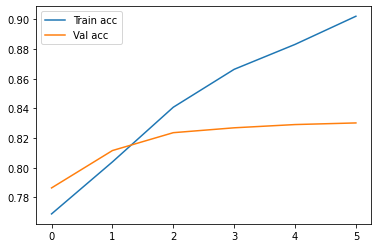

In [38]:
plt.plot(h.history['accuracy'], label = 'Train acc')
plt.plot(h.history['val_accuracy'], label = 'Val acc')
plt.legend();

Overall, the neural network classification models were not able to perform as well as the extra trees classifier with accuracy and precision scores. It was good to test the neural network classification model as an option since it is so powerful but ultimately will not use this as the productio model. 